In [1]:
import numpy , random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np


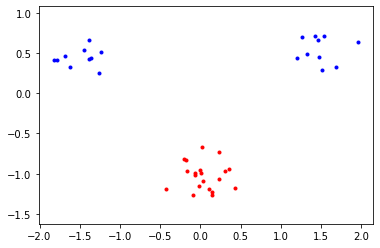

In [2]:
## generating test data
classA = numpy.concatenate ((numpy.random.randn (10,2)*0.2 + [ 1.5 , 0.5 ],numpy.random.randn (10,2)*0.2 + [ - 1.5 , 0.5 ]) )
classB = numpy.random.randn (20, 2) * 0.2 + [0 , -1] ##[ 0.0 , - 0.5] ## 
inputs = numpy.concatenate ( ( classA , classB ) )
targets = numpy.concatenate ((numpy.ones ( classA.shape [ 0 ] ) , - numpy.ones ( classB.shape [ 0 ] ) ) )
N = inputs.shape [ 0 ] # Number of rows ( sample s )
permute= list( range (N) )
random.shuffle ( permute )
inputs = inputs [ permute , : ]
targets = targets [ permute ]

plt.plot ( [ p[0] for p in classA ] ,[ p[1] for p in classA ], 'b.'  )
plt.plot ( [ p[0] for p in classB ] ,[ p[1] for p in classB ], 'r.' )
plt.axis ( 'equal' ) # Force same s c a l e on both axe s
# plt.savefig ( 'svmplot.pdf' ) # Save a copy in a f i l e
plt.show() 

In [3]:
# print (classA)
print (classA.shape)
print (classB.shape)
print (inputs.shape)
print(inputs)
print(numpy.transpose(inputs [3]))
print(targets)

(20, 2)
(20, 2)
(40, 2)
[[ 0.01916436 -0.66611337]
 [ 1.25698748  0.69585277]
 [ 0.00388727 -0.99480971]
 [-1.8229186   0.40948609]
 [-1.26011211  0.25002183]
 [ 1.46920416  0.44915057]
 [ 0.35872026 -0.93903477]
 [-1.68962206  0.46240512]
 [ 1.19864859  0.44206287]
 [ 0.23302491 -1.06877712]
 [ 1.53216803  0.71614984]
 [-0.20203723 -0.82280443]
 [-1.3913222   0.43124532]
 [ 1.68196367  0.33184172]
 [ 0.14381285 -1.23327387]
 [ 0.1460274  -1.25891861]
 [-0.06986986 -1.01257332]
 [-0.01949913 -1.1561995 ]
 [ 1.46497626  0.65744297]
 [ 1.51562559  0.28783966]
 [-1.23435675  0.50740732]
 [ 1.95956357  0.63305062]
 [-0.07298741 -0.99007489]
 [ 0.22520878 -0.72842051]
 [ 0.30874789 -0.9662621 ]
 [-0.08711893 -1.25931349]
 [-0.18320236 -0.82408648]
 [-1.77923003  0.40887808]
 [-1.36514266  0.43937873]
 [ 1.3276449   0.48537137]
 [-0.42975901 -1.18587265]
 [ 1.4207313   0.71113297]
 [ 0.10565653 -1.19510128]
 [-1.62567484  0.32713526]
 [-0.0093373  -0.95078527]
 [ 0.03240796 -1.08963152]
 [-1

In [4]:

# linear kernel  k= xT * y
kernelType = "polynomial"
def kernel (x, y):
    if (kernelType == "linear"):
        k= numpy.dot(np.transpose (x),y);
    elif (kernelType == "polynomial"):
        p=5 ## try 3,4,5 
        k= numpy.power( numpy.dot (np.transpose (x),y)+1, p)
    elif (kernelType == "RBF"):
        sigma= 4
        k= math.exp(-math.pow(numpy.linalg.norm(numpy.subtract(x, y)), 2)/(2 * math.pow(sigma,2)))
    else:
        print ("invalid kernel type")
    return k;


Pmatrix=numpy.zeros(shape=(N,N)) 
for i in range (0,N):
    for j in range (0,N):
        Pmatrix[i][j]=targets[i]* targets[j]*kernel(inputs[i],inputs[j])
            
def objective  (alpha): ## alpha is a vector
    return  (1/2)*numpy.dot(alpha, numpy.dot(alpha, Pmatrix)) - numpy.sum(alpha)
def zerofun(alpha):
    return numpy.dot(alpha,targets) 


def threshold_b ():
    bsum=0
    r=0
    for i in range (0, len (nonzeroalpha)):
        bsum = bsum + nonzeroalpha[i][0]* nonzeroalpha[i][2] * kernel ( nonzeroalpha [0][1],nonzeroalpha[i][1]) ###???
    r=bsum - nonzeroalpha[0][2] ## how to find vector s  ???
    return r

def indicator (x,y,b):
    indsum=0
    result=0
    for i in range (0, len (nonzeroalpha)):
        indsum=indsum+ nonzeroalpha[i][0]* nonzeroalpha[i][2] *kernel ([x, y],nonzeroalpha[i][1])
    result= indsum-b 
#     print(result)
    return result


N: 40


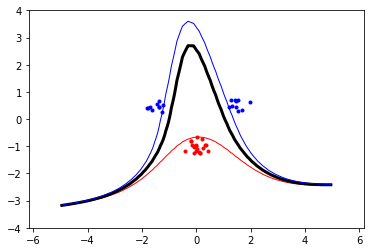

In [8]:
C=1
N = inputs.shape[0]
print ("N:",N)

con={'type':'eq','fun':zerofun}

B=[(0, C) for b in range(N) ]
print ("B:",B)
start=numpy.zeros(N) 
print ("start:",start)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=B, constraints=XC)


if (not ret[ 'success']):  # The string 'success' instead holds a boolean representing if the optimizer has found a solution
    raise ValueError('Cannot find optimizing solution')  ## ?? when does it can not find an optimization?
# Extract non-zero alphas
alpha = ret['x']
# print (alpha)
nonzeroalpha = [(alpha[i], inputs[i], targets[i]) for i in range(N) if abs(alpha[i]) > 10e-5]
# print (nonzeroalpha)

plt.plot ( [ p[0] for p in classA ] ,[ p[1] for p in classA ], 'b.'  )
plt.plot ( [ p[0] for p in classB ] ,[ p[1] for p in classB ], 'r.' )
plt.axis ( 'equal' ) # Force same s c a l e on both axe s

b=threshold_b ()
xgrid=numpy.linspace (-5, 5)
ygrid=numpy.linspace (-4, 4)
grid = numpy.array([[indicator(x, y, b) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, (-1.0,0.0,1.0), colors=('red','black','blue'), linewidths=(1,3,1))
# plt.savefig ( 'D:/Sweden/DD2421_ML/lab2_SVM/hard_poly_p5_C10.png', dpi=300 ) # Save a copy in a f i l e
plt.show() 

In [48]:
a_1d=[1,2,3]
a_2d= [[2, 2, 2], [1, 1, 1]]
b=[2,2,2]
print(numpy.dot(a_1d,b))
print(numpy.dot(a_2d,b))
# print (numpy.sum( numpy.dot(a,b) ))


# a = [1, 2, 3]
# print(np.sum(a, axis=0))

# a = np.array([1,2]) 
# b = np.array([11,12]) 

# print ( np.dot(numpy.transpose(a),b)  )
# print ( np.dot(a,b)   )

12
[12  6]
